# EDSA 2021: Team_4 Regression Sendy Logistics Challenge



# Overview

### Installing packages and importing libraries and data

   * Install lightgbm and xgboost
   * Import libraries
### Exploratory Data Analysis


   * Understand the train and test datasets
   * Visualization
        * Visualization of Temperature and Precipitation from the training data
        * Visualization of Temperature and Precipitation from the testing data
        * Deductions from the train dataset data column distribution.
        * Deductions from the test dataset data column distribution.
   * Correlation
   * Time conversion in EDA
        * Converting time format provided to datatime.
        * Converting the datatime to hours for more in depth time analysis.
   * Match the number of train columns to the number of test columns and also separate the target variable
   * New features recommendations from EDA
   
### Data Cleaning and Formatting

   * Creating Full_df
   * Renaming columns
   * Convert time from 12h to 24hr format
   * Filling Missing Values
       * Dropping Precipitation
   * Traversing Month and Weekday
   * Creating Month and Weekday columns
   * Dropping redundant columns
   * Predictor variables data types
   * Variable Encoding
   
### Feature Engineering

   * Feature selection
   
### Train/Test Split

   * Split data between train and test set
   
### Modeling

   * Cross Validation
   
### Making Predictions

   * Model Testing
   
     * SVR
     * GBR
     * EXR
     * RFR
     * XGBR
     * LGBM
   * Parameter Tuning: lgbm
   * Training and making a prediction
   
### Submission

## Introduction

Logistics remains a challenge to navigate efficient and cost-effective business in parts of Sub-Saharan Africa and the use of data is critical to help business owners to deliver efficient customer service to customers. Sendy logistic is in no way exempted from these market challenges.
[Sendy logistics](https://zindi.africa/hackathons/edsa-2021-sendy-logistics-challenge)


In this notebook, based on historic data used to predict an accurate time for the arrival of the rider at the destination of a package, we will be building a machine learning model that predicts an accurate delivery time, from picking up a package to arriving at the final destination. An accurate arrival time prediction will assist businesses to improve their logistics and communicate an accurate time to their customers.

## Installing packages and importing libraries and data

### Install lightgbm and xgboost

Install packages to test against the pre-exisiting packages in the python environment for model performance

In [1]:
!pip install lightgbm

In [2]:
!pip install xgboost

### Import libraries 

In [3]:
# Linear algebra
import numpy as np

# Data processing
import pandas as pd

# Date library
import datetime as dt



# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error

# Algorithms
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# import xgboost as xgb and lightgbm as lgbm
import xgboost as xgb
import lightgbm as lgbm

# Set arguements for seaborn plots
sns.set(style='white', context='notebook', palette='deep')

## Importing the dataset

In [8]:
#Train_Masked has extra columns: Delivery destination (day, month, time)
train_df = pd.read_csv('Train.csv') 
test_df = pd.read_csv('Test.csv') 
rider_df = pd.read_csv('Riders.csv') 
variable_df = pd.read_csv('VariableDefinitions.csv')

## Exploritory Data Analysis

### Understand the train and test datasets

In [9]:
#View the first 5 columns of the dataframe that contains the training data
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [10]:
#View the first 5 columns of the dataframe that contains the testing data
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [6]:
# Examine the number of columns and rows in the dataframes with pandas.shape() method
print(f'train: {train_df.shape} \n  test: {test_df.shape} \n riders: {rider_df.shape}')

train: (21201, 29) 
  test: (7068, 25) 
 riders: (960, 5)


There are 21 201, 7 068 and 960 data entries in the train, test and riders dataset respectevily.
Also, there are 29, 25 and 5 columns in the train, test and riders dataset respectevily. 

In [11]:
# View the specific column names in the dataframe that contains the training data
train_df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [22]:
# View the specific column names in the dataframe that contains the testing data
test_df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')

In [12]:
# Evaluate the number of columns between the train set and test set
for col in train_df.columns:
    if col not in test_df.columns:
        print(col)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


There are four data columns in the train dataset that are not in the test dataset 

* Arrival at Destination - Day of Month
* Arrival at Destination - Weekday (Mo = 1)
* Arrival at Destination - Time
* Time from Pickup to Arrival

In [13]:
#Summary statistics to check the number of missing values in the train set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [25]:
#Summary statistics to check the number of missing values in the test set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [14]:
#The total number of null values in the columns with null values in the train set
train_df.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [27]:
#The total number of null values in the columns with null values in the test set
test_df.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [15]:
# Function for the percentage of missing values in the train and test set
def missing_values(df, threshold=0):
    """Returns the feature name and the % of  missing values as dataframe"""

    return pd.DataFrame(data= {col: (df[col].isnull().mean()) for col in df.columns if df[col].isnull().mean() > threshold}, 
             index=['% of Missing values']).T

In [16]:
missing_values(train_df)

,% of Missing values
Temperature,0.205934
Precipitation in millimeters,0.973963


The train dataset has "Temperature" and "Precipitation in millimeters" data columns with 20.59 % and 97.4 % of data missing.

In [17]:
missing_values(test_df)

,% of Missing values
Temperature,0.203311
Precipitation in millimeters,0.971845


The test dataset has "Temperature" and "Precipitation in millimeters" data columns with 20.33 % and 97.18% of data missing.

In [18]:
train_df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [31]:
test_df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958


### Visualization

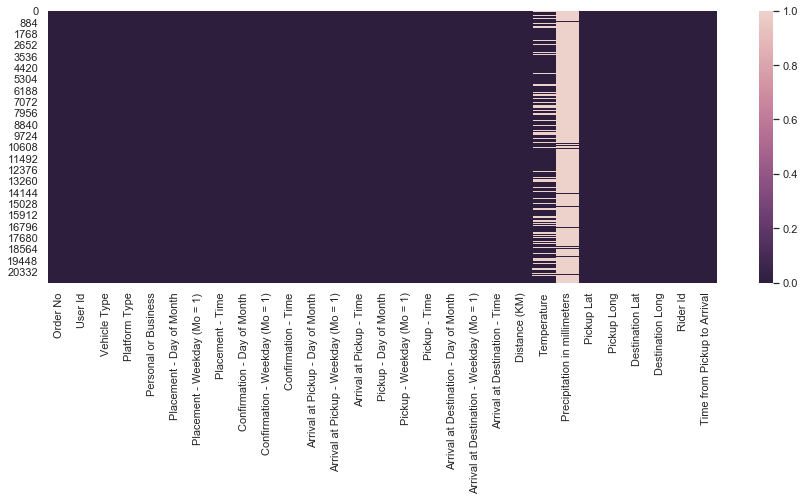

In [19]:
# Visualising the percentage of missing values of the temperature and precipitation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 5))
cmap = sns.cubehelix_palette(as_cmap=True, reverse=True)
sns.heatmap(train_df.isnull(), cmap=cmap)

#### Visualization of Temperature and Precipitation from the training data

Visuals from train dataset depicting data columns( "Temperature" and " precipitation in millimetrs") with missing values.

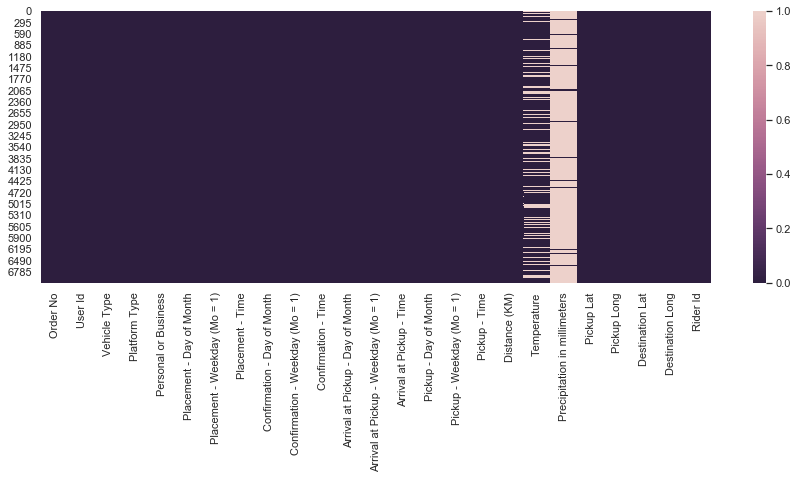

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 5))
cmap = sns.cubehelix_palette(as_cmap=True, reverse=True)
sns.heatmap(test_df.isnull(), cmap=cmap)

#### Visualization of Temperature and Precipitation from the testing data

Visuals from test dataset depicting data columns( "Temperature" and " precipitation in millimetrs") with missing values.

## Data Distribution 

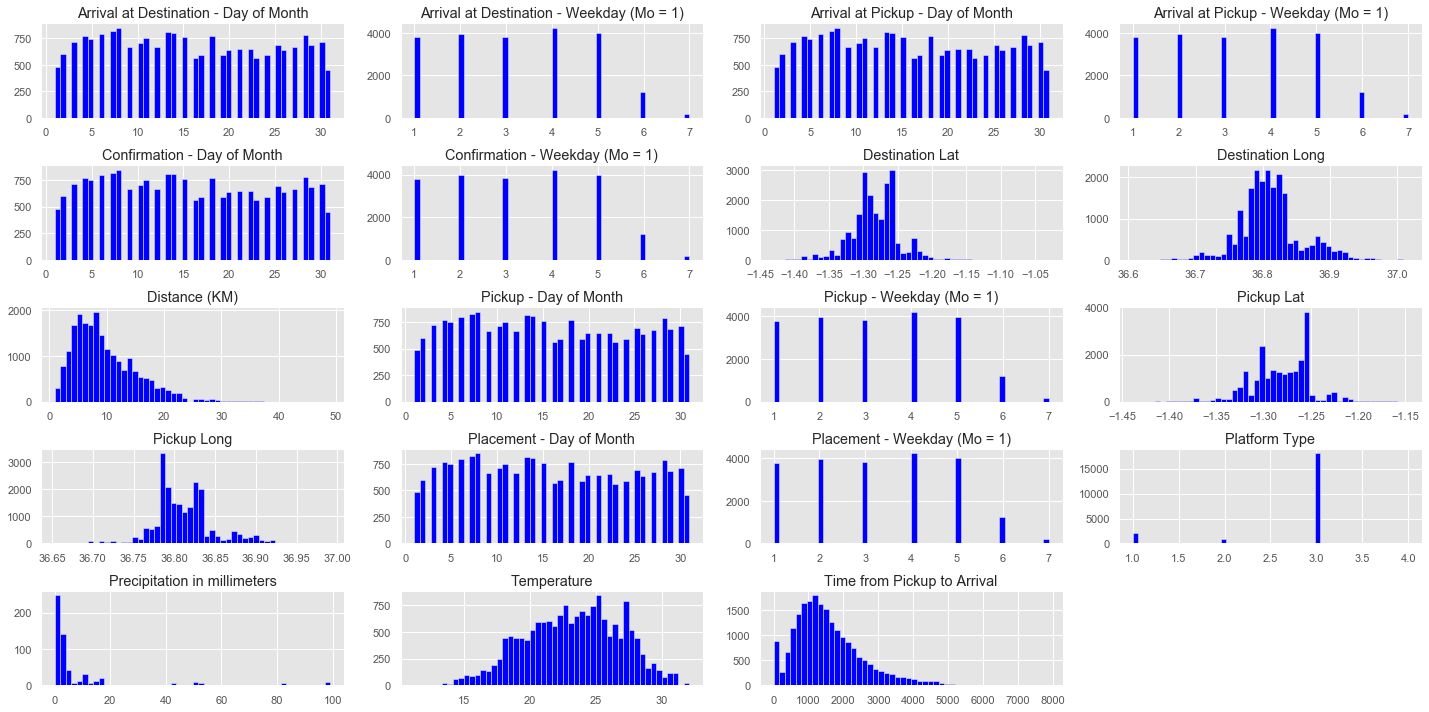

In [27]:
#Distribution review for train data
train_df[[column for column in train_df.select_dtypes(include='number')]].hist(bins=50, figsize=(20,10), color = 'Blue')
plt.tight_layout()
plt.show()

#### Deductions from the train dataset  column distribution.

* The most common temperature is 25 degrees Celsius.
* Platform 3 is the most used platform type
* Most of the orders delievered are from Business clients.
* Most orders are dealt with during the weekdays than on the weekend.
* Most of the trips covered between 8KM and 15KM.

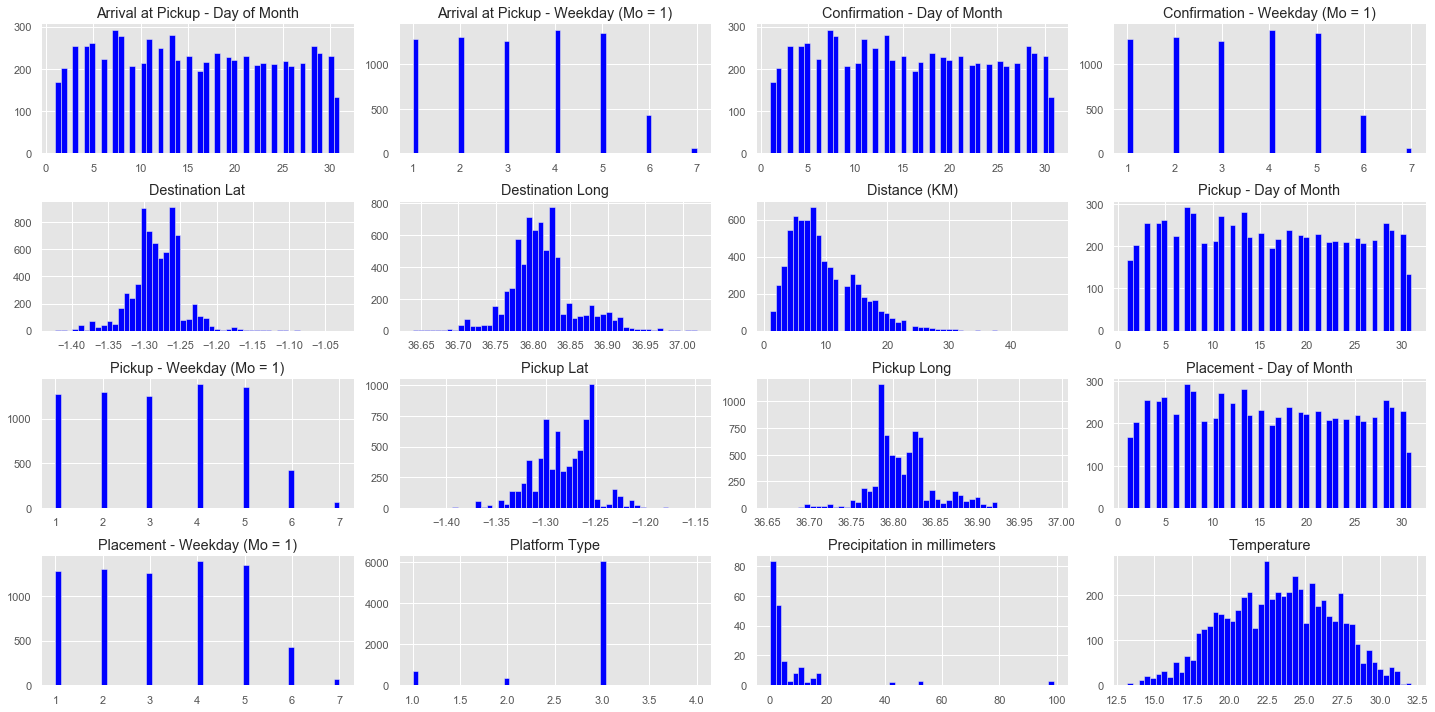

In [28]:
#Distribution review for test data
test_df[[column for column in test_df.select_dtypes(include='number')]].hist(bins=50, figsize=(20,10), color = 'Blue')
plt.tight_layout()
plt.show()

#### Deductions from the test dataset  column distribution.

* The most common temperature is 22,5 degrees Celsius.
* Platform 3 is the most used platform type
* Most of the orders delievered are from Business clients.
* Most orders are dealt with during the weekdays than on the weekend.
* Most of the trips covered between 4KM and 10KM.

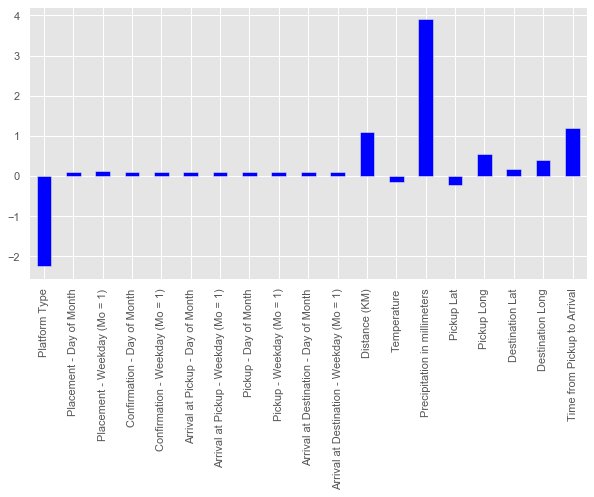

In [29]:
#Column Skewness of the testing dataset
train_df.skew().plot.bar(figsize =(10,5), color = 'Blue')
plt.show()

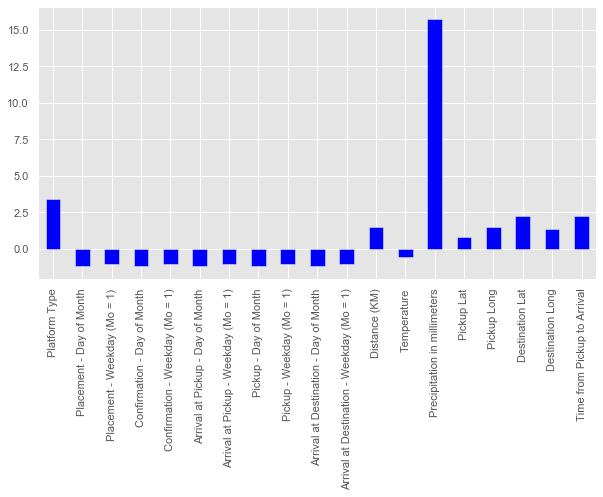

In [31]:
# Univariate Analysis for calculating Skewness in the columns of our Training dataset
train_df.kurt().plot.bar(figsize =(10,5), color = 'Blue')
plt.show()

## Correlation

The correlation matrix and heatmap to explore how the predictor varaibles are correlated to each other

In [33]:
# Summary dataframe of the correlations in the train set
CorrMatrix_train = train_df.corr()
CorrMatrix_train.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.225060,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.013097,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.031064,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744


In [34]:
# Summary dataframe of the correlations in the test set
CorrMatrix_test = test_df.corr()
CorrMatrix_train.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.225060,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.013097,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.031064,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744


### Correlation Visualization

Text(0.5, 1.05, 'Train Dataset Pearson Correlation of Features')

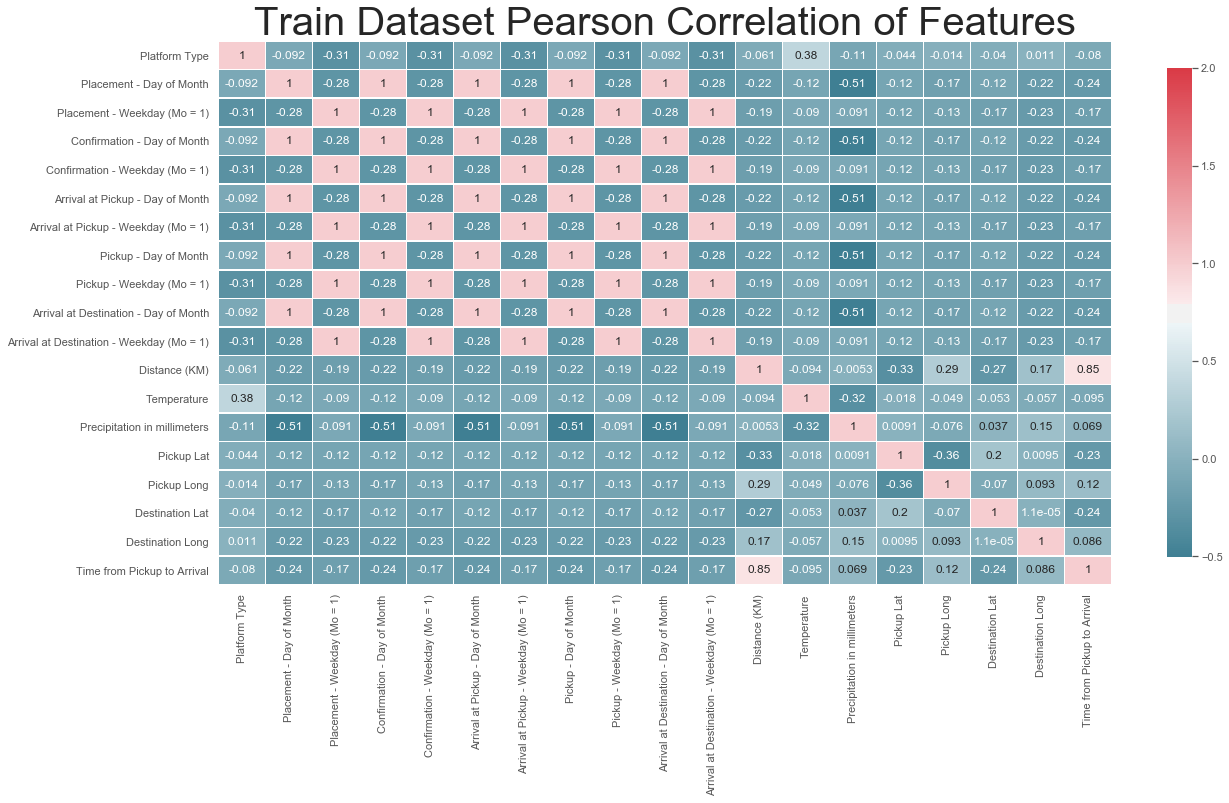

In [56]:
# Heatmap plot of the correlation in the train set
import matplotlib.style as style
style.use('ggplot')
cm = CorrMatrix_train.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = colormap,cbar_kws={'shrink':.9 },
           linewidths=0.5,vmax=2.0, linecolor='white',annot_kws={'fontsize':12 })
plt.title('Train Dataset Pearson Correlation of Features', y=1.05, size=40)

Text(0.5, 1.05, 'Test Dataset Pearson Correlation of Features')

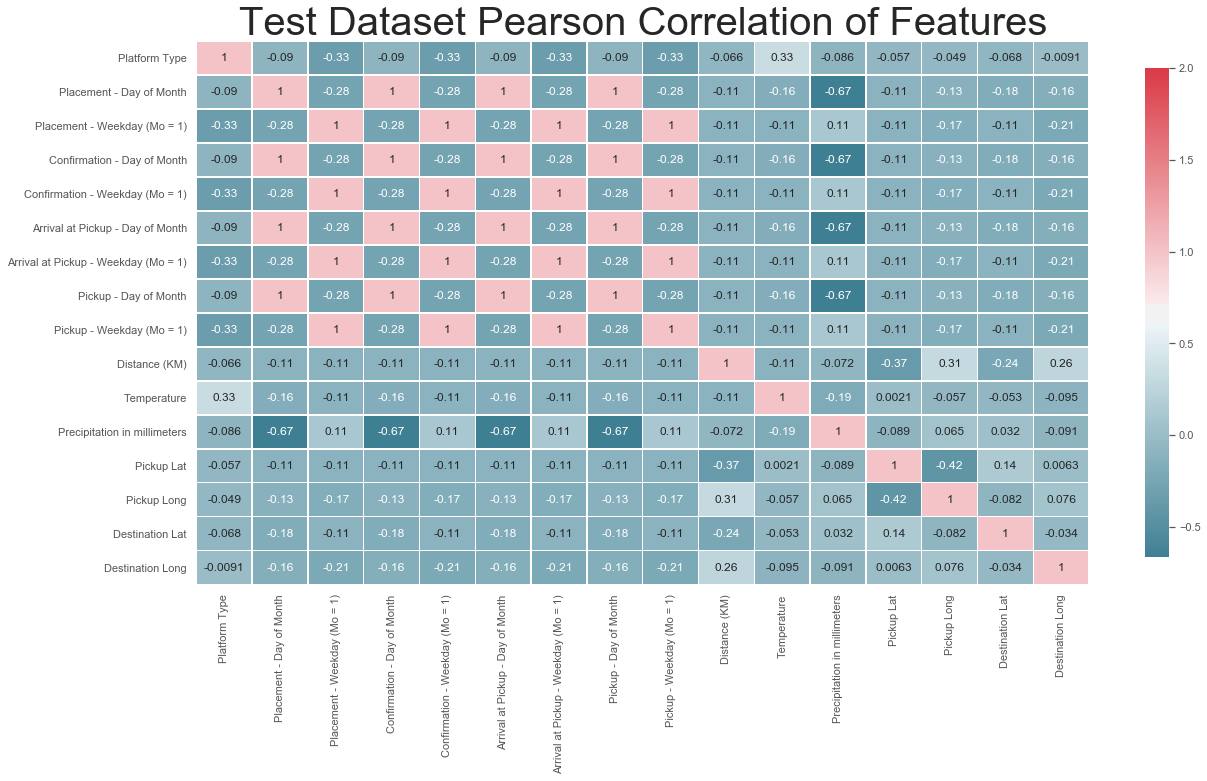

In [57]:
# Heatmap plot of the correlation in the test set
import matplotlib.style as style
style.use('ggplot')
cm = CorrMatrix_test.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = colormap,cbar_kws={'shrink':.9 },
           linewidths=0.5,vmax=2.0, linecolor='white',annot_kws={'fontsize':12 })
plt.title('Test Dataset Pearson Correlation of Features', y=1.05, size=40)

### Weekdays Definition

In [147]:
train_df["Pickup - Weekday (Mo = 1)"].unique()

array([5, 2, 1, 3, 4, 6, 7], dtype=int64)

In [106]:
test_df["Pickup - Weekday (Mo = 1)"].unique()

array([3, 5, 4, 1, 2, 6, 7], dtype=int64)

The company is running operation for 7 days a week.

In [111]:
train_df[train_df["Pickup - Weekday (Mo = 1)"]!=train_df["Arrival at Destination - Weekday (Mo = 1)"]]

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Pickup_Hour,Pickup_Minutes,Arrival_Destination_Hour,Arrival_Destination_Minutes,Time from Pickup to Arrival_Hour,Time from Pickup to Arrival_Minutes


All orders are delivered on the same day they are picked up, this is because there are no orders where the day of the week of the pick-up is not the day of the week of the arrival.



### Datetime conversion

In [37]:
train_df['Pickup - Time'] = pd.to_datetime(train_df['Pickup - Time'])
train_df['Arrival at Destination - Time'] = pd.to_datetime(train_df['Arrival at Destination - Time'])

#### Converting time format provided to datatime.

In [38]:
#Time Conversions.
train_df['Pickup_Hour'] = train_df['Pickup - Time'].dt.hour
train_df['Arrival_Destination_Hour'] = train_df['Arrival at Destination - Time'].dt.hour
train_df['Time from Pickup to Arrival_Hour'] = train_df['Arrival at Destination - Time'].dt.hour

### Converting the datatime to hours for more in depth time analysis.

#### Pickup_Hour

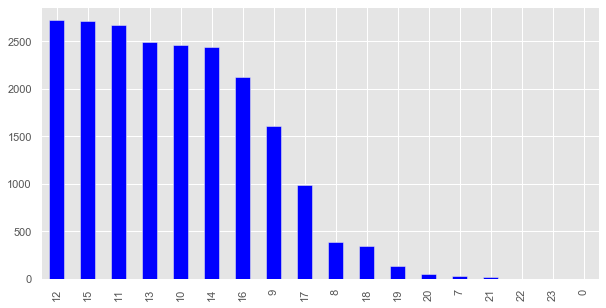

In [39]:
# Distribution plot of frequency of pick up hours
train_df['Pickup_Hour'].value_counts().plot(kind='bar',figsize=[10,5], color = 'blue')

Most of pickup hours are between 9 AM in the morning to 5 PM in the afternoon.


#### Arrival_Destination_Hour

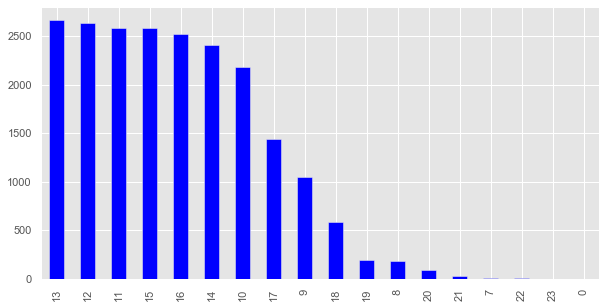

In [40]:
# Distribution plot of the frequency of arrival hours
train_df['Arrival_Destination_Hour'].value_counts().plot(kind='bar',figsize=[10,5], color = 'Blue')

Most of the Destination arrival hours are between 9 AM in the morning to 5 PM in the afternoon.

#### Arrival at Pickup - Day of Month

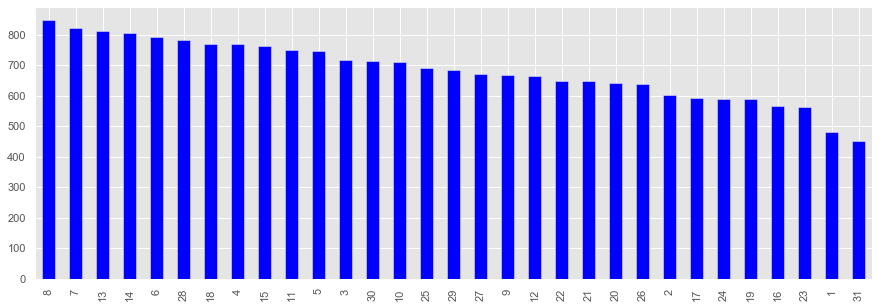

In [41]:
# Distribution of frequency of arrival at pick up by the day of the month
train_df['Arrival at Pickup - Day of Month'].value_counts().plot(kind='bar',figsize=[15,5], color = 'Blue')

## Target Variable

#### Time from Pickup to Arrival_Hour

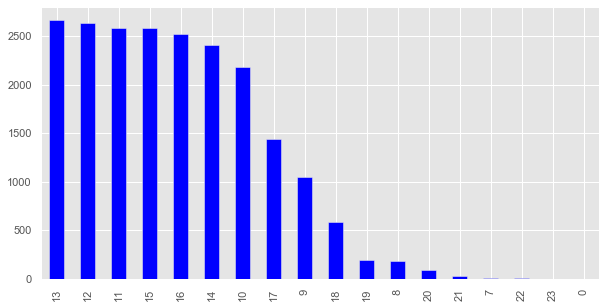

In [43]:
# Distribution plot of time of pick up to arrival
train_df['Time from Pickup to Arrival_Hour'].value_counts().plot(kind='bar',figsize=[10,5], color = 'blue')

Most of the Time from Pickup to Arrival_Hour are between 9 AM in the morning to 5 PM in the afternoon.

#### Time from Pickup to Arrival_Hour Description 

In [45]:
train_df['Time from Pickup to Arrival_Hour'].describe()

count    21201.000000
mean        13.303995
std          2.570458
min          0.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         23.000000
Name: Time from Pickup to Arrival_Hour, dtype: float64

#### Peak hour - Time from Pickup to Arrival_Hour

In [73]:
count = train_df['Time from Pickup to Arrival_Hour'].value_counts()
print(count)

13    2668
12    2636
11    2589
15    2586
16    2521
14    2411
10    2189
17    1445
9     1054
18     586
19     195
8      180
20      89
21      34
7        8
22       8
23       1
0        1
Name: Time from Pickup to Arrival_Hour, dtype: int64


The peak for Time from Pick to Arrival_hour is taking place at 1 PM in the afternoon and lowest at between 23:00 PM and 00:00 AM in the early hours of the morning.

In [72]:
# Checking for missing values in "Time from Pickup to Arrival_Hour" variable.
train_df['Time from Pickup to Arrival_Hour'].isnull().sum()

0

The "Time from Pickup to Arrival" does not have any missing values.

### Match the number of train columns to the number of test columns and also separate the target variable

In [132]:
# Save the columns from the test dataframe into a new list called testcols
testcols = test_df.columns

# Reassign the number of the train dataframe to match that of the test by saving them to an updated dataframe, newtrain
train1 = train_df[testcols]

# Seperate the target variable from the predictor variable
y = np.array(train_df['Time from Pickup to Arrival']).reshape(-1, 1)

In [133]:
# Drop data not available in test, Pickup Time + label = Arrival times

train_df = train_df.drop(['Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Time'], axis=1)

In [ ]:
# Print the new columns of the train and test data to show that they are the same
print(train1.columns)
print(test_df.columns)

### New features recommendations from EDA

In [47]:
def time_of_day(hour):
    if (hour > 0) and (hour <= 12 ):
        return 'AM'
    else:
        return'PM'

In [54]:
# View numeric columns in the training set
Numeric_Training = train_df._get_numeric_data()
Numeric_Training.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,Pickup_Hour,Arrival_Destination_Hour,Time from Pickup to Arrival_Hour
0,3,9,5,9,5,9,5,9,5,9,...,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,745,10,10,10
1,3,12,5,12,5,12,5,12,5,12,...,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,11,12,12
2,3,30,2,30,2,30,2,30,2,30,...,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,455,12,13,13
3,3,15,5,15,5,15,5,15,5,15,...,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,1341,9,10,10
4,1,13,1,13,1,13,1,13,1,13,...,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,1214,10,10,10


## Data Cleaning and Formatting

### Creating Full_df

In [61]:
#Create (full_df = train + test) ** caution (dont shuffle, avoid drop/adding rows)
#explore training, make (column) changes to full, later we use the border to separate
#Be careful of information leakage

border = train_df.shape[0]
test_df['Time from Pickup to Arrival'] = [np.nan]* test_df.shape[0]
full_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

train_df.shape, test_df.shape, full_df.shape

((21201, 32), (7068, 26), (28269, 32))

### Renaming columns

In [62]:
#Renaming columns (shorten, remove space, standardize)
new_names = {"Order No": "Order_No", "User Id": "User_Id", "Vehicle Type": "Vehicle_Type",
    "Personal or Business": "Personal_Business", "Placement - Day of Month": "Pla_Mon",
    "Placement - Weekday (Mo = 1)": "Pla_Weekday", "Placement - Time": "Pla_Time", 
    "Confirmation - Day of Month":"Con_Day_Mon", "Confirmation - Weekday (Mo = 1)": "Con_Weekday","Confirmation - Time": "Con_Time", 
    "Arrival at Pickup - Day of Month": "Arr_Pic_Mon", "Arrival at Pickup - Weekday (Mo = 1)": "Arr_Pic_Weekday", 
                "Arrival at Pickup - Time": "Arr_Pic_Time", "Platform Type": "Platform_Type",
     "Pickup - Day of Month": "Pickup_Mon", "Pickup - Weekday (Mo = 1)": "Pickup_Weekday",           
    "Pickup - Time": "Pickup_Time",  "Distance (KM)": "Distance(km)",
    "Precipitation in millimeters": "Precipitation(mm)", "Pickup Lat": "Pickup_Lat", "Pickup Long": "Pickup_Lon", 
    "Destination Lat": "Destination_Lat", "Destination Long":"Destination_Lon", "Rider Id": "Rider_Id",
                            "Time from Pickup to Arrival": "Time_Pic_Arr"
                           }

full_df = full_df.rename(columns=new_names)
full_df.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_Business', 'Pla_Mon', 'Pla_Weekday', 'Pla_Time',
       'Con_Day_Mon', 'Con_Weekday', 'Con_Time', 'Arr_Pic_Mon',
       'Arr_Pic_Weekday', 'Arr_Pic_Time', 'Pickup_Mon', 'Pickup_Weekday',
       'Pickup_Time', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance(km)', 'Temperature',
       'Precipitation(mm)', 'Pickup_Lat', 'Pickup_Lon', 'Destination_Lat',
       'Destination_Lon', 'Rider_Id', 'Time_Pic_Arr', 'Pickup_Hour',
       'Arrival_Destination_Hour', 'Time from Pickup to Arrival_Hour'],
      dtype='object')

### Filling Missing Values

In [64]:
#Filling Missing Values for temperatures and humidity

full_df['Temperature'] = full_df['Temperature'].fillna(full_df['Temperature'].mean())
full_df['Precipitation(mm)'].fillna(full_df['Precipitation(mm)'].mean(), inplace=True)

In [65]:
full_df.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_Business,Pla_Mon,Pla_Weekday,Pla_Time,Con_Day_Mon,Con_Weekday,...,Precipitation(mm),Pickup_Lat,Pickup_Lon,Destination_Lat,Destination_Lon,Rider_Id,Time_Pic_Arr,Pickup_Hour,Arrival_Destination_Hour,Time from Pickup to Arrival_Hour
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,7.573502,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,10.0,10.0,10.0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,7.573502,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,11.0,12.0,12.0
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,7.573502,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,12.0,13.0,13.0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,7.573502,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,9.0,10.0,10.0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,7.573502,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,10.0,10.0,10.0


### Traversing Month and Weekday

In [66]:
month_cols = [col for col in full_df.columns if col.endswith("Mon")]
weekday_cols = [col for col in full_df.columns if col.endswith("Weekday")]

count = 0
instances_of_different_days = [];
for i, row in full_df.iterrows():
    if len(set(row[month_cols].values)) > 1:
        print(count+1, end="\r")
        count = count + 1
        instances_of_different_days.append(list(row[month_cols].values))
instances_of_different_days

[[17, 18, 18, 18], [11, 13, 13, 13]]

In [67]:
month_cols

['Pla_Mon', 'Con_Day_Mon', 'Arr_Pic_Mon', 'Pickup_Mon']

In [21]:
weekday_cols

['Pla_Weekday', 'Con_Weekday', 'Arr_Pic_Weekday', 'Pickup_Weekday']

### Creating Month and Weekday columns

In [22]:
full_df['Day_of_Month'] = full_df[month_cols[0]]
full_df['Day_of_Week'] = full_df[weekday_cols[0]]

### Dropping redundant columns

In [23]:
#All Vehicle types are Bikes, Vehicle Type is not necessary.
#Day & Weekday values are repeated in all rows except 2, we retain only one
full_df.drop(month_cols+weekday_cols, axis=1, inplace=True)
full_df.drop('Vehicle_Type', axis=1, inplace=True)

full_df.head(3)

,Order_No,User_Id,Platform_Type,Personal_Business,Pla_Time,Con_Time,Arr_Pic_Time,Pickup_Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),...,Temperature,Precipitation(mm),Pickup_Lat,Pickup_Lon,Destination_Lat,Destination_Lon,Rider_Id,Time_Pic_Arr,Day_of_Month,Day_of_Week
0,Order_No_4211,User_Id_633,3,Business,09:35:46,09:40:10,10:04:47,10:27:30,9.0,5.0,...,20.400000,7.573502,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,9,5
1,Order_No_25375,User_Id_2285,3,Personal,11:16:16,11:23:21,11:40:22,11:44:09,12.0,5.0,...,26.400000,7.573502,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,12,5
2,Order_No_1899,User_Id_265,3,Business,12:39:25,12:42:44,12:49:34,12:53:03,30.0,2.0,...,23.255689,7.573502,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,30,2


In [24]:
full_df.head()

,Order_No,User_Id,Platform_Type,Personal_Business,Pla_Time,Con_Time,Arr_Pic_Time,Pickup_Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),...,Temperature,Precipitation(mm),Pickup_Lat,Pickup_Lon,Destination_Lat,Destination_Lon,Rider_Id,Time_Pic_Arr,Day_of_Month,Day_of_Week
0,Order_No_4211,User_Id_633,3,Business,09:35:46,09:40:10,10:04:47,10:27:30,9.0,5.0,...,20.400000,7.573502,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,9,5
1,Order_No_25375,User_Id_2285,3,Personal,11:16:16,11:23:21,11:40:22,11:44:09,12.0,5.0,...,26.400000,7.573502,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,12,5
2,Order_No_1899,User_Id_265,3,Business,12:39:25,12:42:44,12:49:34,12:53:03,30.0,2.0,...,23.255689,7.573502,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,30,2
3,Order_No_9336,User_Id_1402,3,Business,09:25:34,09:26:05,09:37:56,09:43:06,15.0,5.0,...,19.200000,7.573502,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,15,5
4,Order_No_27883,User_Id_1737,1,Personal,09:55:18,09:56:18,10:03:53,10:05:23,13.0,1.0,...,15.400000,7.573502,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,13,1


In [25]:
full_df.columns

Index(['Order_No', 'User_Id', 'Platform_Type', 'Personal_Business', 'Pla_Time',
       'Con_Time', 'Arr_Pic_Time', 'Pickup_Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance(km)', 'Temperature',
       'Precipitation(mm)', 'Pickup_Lat', 'Pickup_Lon', 'Destination_Lat',
       'Destination_Lon', 'Rider_Id', 'Time_Pic_Arr', 'Day_of_Month',
       'Day_of_Week'],
      dtype='object')

### Predictor variable datatypes

In [26]:
numeric_cols = []
object_cols = []
time_cols = []
for k, v in full_df.dtypes.items():
    if (v != object):
        if (k != "Time_Pic_Arr"):
            numeric_cols.append(k)
    elif k.endswith("Time"):
        time_cols.append(k)
    else:
        object_cols.append(k)

In [27]:
full_df[numeric_cols].head()

,Platform_Type,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance(km),Temperature,Precipitation(mm),Pickup_Lat,Pickup_Lon,Destination_Lat,Destination_Lon,Day_of_Month,Day_of_Week
0,3,9.0,5.0,4,20.400000,7.573502,-1.317755,36.830370,-1.300406,36.829741,9,5
1,3,12.0,5.0,16,26.400000,7.573502,-1.351453,36.899315,-1.295004,36.814358,12,5
2,3,30.0,2.0,3,23.255689,7.573502,-1.308284,36.843419,-1.300921,36.828195,30,2
3,3,15.0,5.0,9,19.200000,7.573502,-1.281301,36.832396,-1.257147,36.795063,15,5
4,1,13.0,1.0,9,15.400000,7.573502,-1.266597,36.792118,-1.295041,36.809817,13,1


In [28]:
full_df[time_cols].head()

,Pla_Time,Con_Time,Arr_Pic_Time,Pickup_Time,Arrival at Destination - Time
0,09:35:46,09:40:10,10:04:47,10:27:30,10:39:55
1,11:16:16,11:23:21,11:40:22,11:44:09,12:17:22
2,12:39:25,12:42:44,12:49:34,12:53:03,13:00:38
3,09:25:34,09:26:05,09:37:56,09:43:06,10:05:27
4,09:55:18,09:56:18,10:03:53,10:05:23,10:25:37


In [29]:
full_df[object_cols].head()

,Order_No,User_Id,Personal_Business,Rider_Id
0,Order_No_4211,User_Id_633,Business,Rider_Id_432
1,Order_No_25375,User_Id_2285,Personal,Rider_Id_856
2,Order_No_1899,User_Id_265,Business,Rider_Id_155
3,Order_No_9336,User_Id_1402,Business,Rider_Id_855
4,Order_No_27883,User_Id_1737,Personal,Rider_Id_770


### Variable encoding

Convert object types to numeric

In [30]:
# Convert the Personal_Business column to numeric column
le = LabelEncoder()
le.fit(full_df['Personal_Business'])
full_df['Personal_Business'] = le.transform(full_df['Personal_Business'])
full_df['Personal_Business'][:2]


0    0
1    1
Name: Personal_Business, dtype: int32

In [31]:

full_df.head()

,Order_No,User_Id,Platform_Type,Personal_Business,Pla_Time,Con_Time,Arr_Pic_Time,Pickup_Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),...,Temperature,Precipitation(mm),Pickup_Lat,Pickup_Lon,Destination_Lat,Destination_Lon,Rider_Id,Time_Pic_Arr,Day_of_Month,Day_of_Week
0,Order_No_4211,User_Id_633,3,0,09:35:46,09:40:10,10:04:47,10:27:30,9.0,5.0,...,20.400000,7.573502,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,9,5
1,Order_No_25375,User_Id_2285,3,1,11:16:16,11:23:21,11:40:22,11:44:09,12.0,5.0,...,26.400000,7.573502,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,12,5
2,Order_No_1899,User_Id_265,3,0,12:39:25,12:42:44,12:49:34,12:53:03,30.0,2.0,...,23.255689,7.573502,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,30,2
3,Order_No_9336,User_Id_1402,3,0,09:25:34,09:26:05,09:37:56,09:43:06,15.0,5.0,...,19.200000,7.573502,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,15,5
4,Order_No_27883,User_Id_1737,1,1,09:55:18,09:56:18,10:03:53,10:05:23,13.0,1.0,...,15.400000,7.573502,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,13,1


## Feature Engineering

### Feature Selection

In [32]:
# Adding the Person_Business column to the numeric columns
features = numeric_cols + ['Personal_Business']

data_df = full_df[features]

y = full_df[:border]['Time_Pic_Arr']
train = data_df[:border]
test = data_df[border:]

train.head()

,Platform_Type,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance(km),Temperature,Precipitation(mm),Pickup_Lat,Pickup_Lon,Destination_Lat,Destination_Lon,Day_of_Month,Day_of_Week,Personal_Business
0,3,9.0,5.0,4,20.400000,7.573502,-1.317755,36.830370,-1.300406,36.829741,9,5,0
1,3,12.0,5.0,16,26.400000,7.573502,-1.351453,36.899315,-1.295004,36.814358,12,5,1
2,3,30.0,2.0,3,23.255689,7.573502,-1.308284,36.843419,-1.300921,36.828195,30,2,0
3,3,15.0,5.0,9,19.200000,7.573502,-1.281301,36.832396,-1.257147,36.795063,15,5,0
4,1,13.0,1.0,9,15.400000,7.573502,-1.266597,36.792118,-1.295041,36.809817,13,1,1


In [33]:
print(full_df.shape,data_df.shape,train.shape,test.shape,y.shape)

(28269, 22) (28269, 13) (21201, 13) (7068, 13) (21201,)


In [34]:
train

,Platform_Type,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance(km),Temperature,Precipitation(mm),Pickup_Lat,Pickup_Lon,Destination_Lat,Destination_Lon,Day_of_Month,Day_of_Week,Personal_Business
0,3,9.0,5.0,4,20.400000,7.573502,-1.317755,36.830370,-1.300406,36.829741,9,5,0
1,3,12.0,5.0,16,26.400000,7.573502,-1.351453,36.899315,-1.295004,36.814358,12,5,1
2,3,30.0,2.0,3,23.255689,7.573502,-1.308284,36.843419,-1.300921,36.828195,30,2,0
3,3,15.0,5.0,9,19.200000,7.573502,-1.281301,36.832396,-1.257147,36.795063,15,5,0
4,1,13.0,1.0,9,15.400000,7.573502,-1.266597,36.792118,-1.295041,36.809817,13,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,3,20.0,3.0,3,28.600000,7.573502,-1.258414,36.804800,-1.275285,36.802702,20,3,1
21197,3,13.0,6.0,7,26.000000,7.573502,-1.307143,36.825009,-1.331619,36.847976,13,6,0
21198,3,7.0,4.0,20,29.200000,7.573502,-1.286018,36.897534,-1.258414,36.804800,7,4,0
21199,1,4.0,3.0,13,15.000000,7.573502,-1.250030,36.874167,-1.279209,36.794872,4,3,1


In [35]:
test

,Platform_Type,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance(km),Temperature,Precipitation(mm),Pickup_Lat,Pickup_Lon,Destination_Lat,Destination_Lon,Day_of_Month,Day_of_Week,Personal_Business
21201,3,NaN,NaN,8,23.255689,7.573502,-1.333275,36.870815,-1.305249,36.822390,27,3,0
21202,3,NaN,NaN,5,23.255689,7.573502,-1.272639,36.794723,-1.277007,36.823907,17,5,0
21203,3,NaN,NaN,5,22.800000,7.573502,-1.290894,36.822971,-1.276574,36.851365,27,4,0
21204,3,NaN,NaN,5,24.500000,7.573502,-1.290503,36.809646,-1.303382,36.790658,17,1,0
21205,3,NaN,NaN,6,24.400000,7.573502,-1.281081,36.814423,-1.266467,36.792161,11,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28264,3,NaN,NaN,5,24.800000,7.573502,-1.258414,36.804800,-1.288780,36.816831,7,1,0
28265,3,NaN,NaN,22,30.700000,7.573502,-1.276141,36.771084,-1.316098,36.913164,10,3,0
28266,3,NaN,NaN,10,25.100000,7.573502,-1.301446,36.766138,-1.264960,36.798178,5,3,0
28267,3,NaN,NaN,18,23.600000,7.573502,-1.248404,36.678276,-1.272027,36.817411,29,2,1


In [36]:
y

0         745.0
1        1993.0
2         455.0
3        1341.0
4        1214.0
          ...  
21196       9.0
21197     770.0
21198    2953.0
21199    1380.0
21200    2128.0
Name: Time_Pic_Arr, Length: 21201, dtype: float64

## Train/Test split

Spittling the data into train and test data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16960, 13) (4241, 13) (16960,) (4241,)


## Modeling

### Cross validation

In [38]:
rs = 3
kfold = KFold(n_splits=10, random_state=rs, shuffle=True)

regressors = []
regressors.append(SVR())
regressors.append(GradientBoostingRegressor(random_state=rs))
regressors.append(ExtraTreesRegressor(n_estimators=rs))
regressors.append(RandomForestRegressor(random_state=rs))
#regressors.append(xgb.XGBRegressor(random_state=rs, objective="reg:squarederror"))
regressors.append(lgb.LGBMRegressor(random_state=rs))

cv_results = []
for regressor in regressors:     #scores to be minimised are negated (neg)
    cv_results.append(np.sqrt(abs(cross_val_score(regressor, X_train, y=y_train, scoring='neg_mean_squared_error', cv=kfold))))

cv_means = []
cv_stds = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_stds.append(cv_result.std())
    
#cv_res = pd.DataFrame({ 
#    "Algorithm": ["SVR", "GBR", "EXR", "RFR", "XGBR", "LGBM"],
#    "CrossValMeans": cv_means, "CrossValErrors": cv_stds
#                       })
cv_res = pd.DataFrame({ 
    "Algorithm": ["SVR", "GBR", "EXR", "RFR", "LGBM"],
    "CrossValMeans": cv_means, "CrossValErrors": cv_stds
                       })

cv_res = cv_res.sort_values("CrossValMeans", ascending=True)
print(cv_res)

  Algorithm  CrossValMeans  CrossValErrors
4      LGBM     778.732896       21.619597
1       GBR     781.075062       22.952503
3       RFR     803.613391       23.530973
0       SVR     923.917619       21.137194
2       EXR     938.405092       25.024133


## Making Predictions

### Model Testing

#### Random Forest

In [ ]:
RFC = RandomForestRegressor(random_state=rs)
rf_param = {"max_depth":[None], "max_features":[3], "min_samples_split":[10],
           "min_samples_leaf": [3], "n_estimators":[300]}
rsearch = GridSearchCV(RFC, cv=kfold, scoring='neg_mean_squared_error',param_grid=rf_param)
rfm = rsearch.fit(X_train, y_train)

r_score = np.sqrt(abs(rfm.best_score_))
r_params = rfm.best_p
arams_
print(r_score, r_params)

In [ ]:
Prediction = predict(fit, test)
submit = data.frame(PassengerId = test$PassengerId, Survived = Prediction)
write.csv(submit, file = “firstforest.csv”, row.names = FALSE)

#### Lightgbm (lgbm)

In [ ]:
lgbm_y = lgbm.predict(test, num_iteration=lgbm.best_iteration)
lgbm_output = pd.DataFrame({"Order No":test_df['Order No'], 
                           "Time from Pickup to Arrival": lgbm_y })
lgbm_output.to_csv("submission.csv", index=False)

In [ ]:
y_pred = lr.predict(test_new)

In [ ]:
submission_df = test_df1[['Order No']]
submission_df['Time_Pic_Arr'] = y_pred

### Parameter Tuning: lgbm

In [ ]:
params = {
    'n_estimators':[75], # [75, 95],
    'num_leaves': [15], #[12,15, 17],
    'reg_alpha': [0.02], #[0.02, 0.05],
    'min_data_in_leaf': [300],  #[250, 280, 300]
    'learning_rate': [0.1], #[0.05, 0.1, 0.25],
    'objective': ['regression'] #['regression', None]
    }

lsearch = GridSearchCV(estimator = lgb.LGBMRegressor(random_state=rs), cv=kfold,scoring='neg_mean_squared_error', param_grid=params)
lgbm = lsearch.fit(X_train, y_train)

l_params = lgbm.best_params_
l_score = np.sqrt(abs(lgbm.best_score_))
print(lgbm.best_params_, np.sqrt(abs(lgbm.best_score_)))

### Training and making a prediction

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lparams = {
           'learning_rate': 0.1, 'min_data_in_leaf': 300, 
           'n_estimators': 75, 'num_leaves': 20, 'random_state':rs,
           'objective': 'regression', 'reg_alpha': 0.02,
          'feature_fraction': 0.9, 'bagging_fraction':0.9}


lgbm = lgb.train(lparams, lgb_train, valid_sets=lgb_eval, num_boost_round=20, early_stopping_rounds=20)

lpred = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)

print("The RMSE of prediction is ", mean_squared_error(y_test, lpred)**0.5)


# Submission

In [ ]:
lgbm_y = lgbm.predict(test, num_iteration=lgbm.best_iteration)
lgbm_output = pd.DataFrame({"Order No":test_df['Order No'], 
                           "Time from Pickup to Arrival": lgbm_y })
lgbm_output.to_csv("D:\Temp\submission.csv", index=False)